2020/04/05
株データの解析

ライブラリのインポート

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
%matplotlib inline

URLの設定。ULLNET（ http://www.ullet.com/ ）のサイトから企業名を検索、決算書を選択。
今回は一例として、サイバーエージェントの決算データから純利益率と粗利率を計算し表示する。

In [6]:
## スクライピング処理
url = 'http://www.ullet.com/4751.html#all'
df = pd.read_html(url)

PL参照

In [7]:
# 決算書の「損益計算書（P/L）」を参照
print(df[6])
# インデックス名が重複している一方の"当期純利益"をrename
df[6].loc[7,'決算年月日'] = "当期純利益(率)"

# 行と列変換用に、行のインデックスを名称にする　
# (行と列を入れ替え後に系列名が数字になるのを避けるため)
df_i = df[6].set_index('決算年月日')

# 行と列を変換
df_it=df_i.T
# インデックスをつけなおす
df_it = df_it.reset_index()

# 日付の修正  (この部分は出典１を参考にさせていただきました)
dates = []
for day in df_it['index']:
    day = day.replace("年", "-")
    day = day.replace("月", "-")
    day = day.replace("日", "")
    time = datetime.datetime.strptime(day, '%Y-%m-%d')
    dates.append(time)
df_it["Date"] = dates

## 「損益計算書（P/L）」の解析部分（今回はちょっとだけ）
# 粗利益率を計算
df_it['粗利率'] = df_it['売上総利益'].astype(float) / df_it['売上高'].astype(float) * 100

# 純利益率を計算
df_it['純利益率'] = df_it['当期純利益'].astype(float) / df_it['売上高'].astype(float) * 100

print(df_it)

     決算年月日    2015年9月30日    2016年9月30日   2017年9月30日   2018年9月30日   2019年9月30日
0      売上高        254381        310665       371362       419512       453611
1     売上合計        254381        310665       371362       419512       453611
2     売上原価        162160        197736       248386       289496       320311
3  その他費用収益         77429         99313       118952       125167       131606
4    費用等合計        239589        297049       367338       414663       451917
5    売上総利益         92221        112929       122976       130016       133300
6  税引前当期利益         32314         35341        28741        28565        30493
7    当期純利益  14,792(5.8%)  13,616(4.4%)  4,024(1.1%)  4,849(1.2%)  1,694(0.4%)
8    当期純利益         14792         13616         4024         4849         1694
決算年月日       index     売上高    売上合計    売上原価 その他費用収益   費用等合計   売上総利益 税引前当期利益  \
0      2015年9月30日  254381  254381  162160   77429  239589   92221   32314   
1      2016年9月30日  310665  310665  197736   99313  297049  112929 

粗利の表示

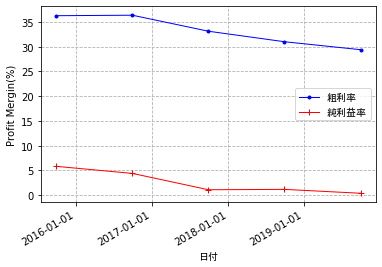

In [13]:
## グラフ表示処理
# 粗利率のプロット
x = df_it['Date']
y1 = df_it['粗利率']
plt.plot(x, y1, color="blue", linewidth=1, linestyle="-",marker='.', label='粗利率')

# 純利益率のプロット
y2 = df_it['純利益率']
plt.plot(x, y2, color="red", linewidth=1, linestyle="-",marker='+', label='純利益率')

# ラベルを追加
plt.xlabel('日付', fontname="MS Gothic")
plt.ylabel('Profit Mergin(%)')

#グリッド線(（お好みで）
plt.grid(True)
plt.grid(which='major',linestyle='dashed')
plt.grid(which='minor',linestyle='dashed')

# x軸の目盛ラベルを年単位で
locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

# 凡例を追加（お好みで）
plt.legend(prop={"family":"MS Gothic"})

plt.show()